# Module 8 Problem Set

In [1]:
# Let us use the classes from the Graph Theory Notebook

In [2]:
import string

class Node(object):
    '''
    This is a class that represents a node. The functions of a class are called methods. Instantiations of this class
    will create objects that have access to the methods. 
    
    Each method begins with an argument of "self" which lets the methos know which object it belongs to.
    
    For the Node object, we care about the name of the node and a dictionary naming the adjacent nodes. The adjacent
    dictionary keys will be the name's of adjacent nodes and the value will be the weight of that edge.
    '''
    def __init__(self, name):
        # The init method is magic python method that get's called when an object is instantiated. 
        self.name = name  # Take the name given at instantiation and assign it to the object
        self.adjacent = {}  # When we create the node, we don't know about any adjacent nodes. Create a placeholder
        
    def __str__(self):
        # When printing a node, format it like this:
        return "Node {}: {}".format(self.name, self.adjacent)
    
    def __repr__(self):
        # When representing this object, use the str method
        return self.__str__()
        

In [3]:
class Graph(object):
    '''
    This class represents a graph. The graph is consists of a collection of nodes. 
    '''
    def __init__(self, adjacency_matrix=None):
        '''
        When the graph is instantiated it will not know about any of its member nodes. There is an optional 
        `adjacency_matrix` argument that defaults to None. If an adjacency_matrix is provided, then we can 
        create the member nodes, their relationships, and add them to this graph.
        '''
        self.nodes = {}
        if adjacency_matrix:
            # We were provided an adjacency matrix
            self._create_member_nodes_from_adjacency_matrix(adjacency_matrix)
            
    def __str__(self):
        return '\n'.join([str(n) for n in self.nodes.values()])
    
    def __repr__(self):
        return self.__str__()
    
    def _create_member_nodes_from_adjacency_matrix(self, adjacency_matrix):
        # A preceeding underscore indicetes a method that is only called within the class. 
        # Create nodes and weights from an adjacency matrix (list of lists) and assign them to this graph
        letters = list(string.ascii_lowercase)  # Get a list of letters to assign to the nodes we create
        needed_letters = len(adjacency_matrix)
        if needed_letters > len(letters):
            # Give the user an error that the input matrix is too large to have 
            raise ValueError("The matrix is too large to create from 26 letters. Please manually assign names to nodes and then add them to the graph.")
        
        for i, row in enumerate(adjacency_matrix):  # get an index of the row and the contentx of the row
            letter_name = letters[i]
            node = Node(letter_name)
            for j, column_value in enumerate(row):
                if column_value != 0:  # There is an adjacent node here
                    adjacent_letter_name = letters[j]
                    node.adjacent[adjacent_letter_name] = column_value
            self.nodes[letter_name] = node
            
    def get_distance_of_path(self, path):
        # Given a list of node names within the graph, find its distance using the node adjacency measures
        distance = 0
        for i, node_name in enumerate(path[:-1]):
            # Gets the index and node name for each in the path except for the last one
            this_node = self.nodes[node_name]
            next_node = self.nodes[path[i+1]]
            distance += this_node.adjacent[next_node.name]  # Get the distance from this_node to next node
        
        return distance
    
    def find_all_paths_between(self, a, b, path=None):
        if not path:
            # No path list provided, create one
            path = []

        path = path + [a] # Add a to the path

        if a == b:  # This is a path to itself, at the end of a path
            return [path]
        if a not in self.nodes:  # a could not be found in the graph
            return []
        paths = []
        for node in self.nodes[a].adjacent:  # look to adjacent nodes of a
            if node not in path:
                newpaths = self.find_all_paths_between(node, b, path)  # Recursivly go down another level
                for newpath in newpaths:
                    paths.append(newpath)
        return paths
    
    def shortest_path(self, a, b):
        # Get the distance of each weighted path and return the shortest
        all_paths = self.find_all_paths_between(a, b)
        
        if not all_paths:
            return []
        
        # The shortest path will be the first path in the list
        shortest_path = None
        shortest_distance = None
        
        for path in all_paths:
            p_distance = self.get_distance_of_path(path)
            if not shortest_distance or p_distance < shortest_distance:
                # This path is shorter
                shortest_path = path
                shortest_distance = p_distance
                
        return shortest_path
    
# The is_tree() function generates incorrect answers.

#     def is_tree(self):
#         # returns True if the graph is a tree, otherwise False
        
#         node_names = list(self.nodes.keys())
#         first = node_names[0]  # Make sure the first node has a path to all other nodes
#         second = node_names[1]  # Used to determine if acyclic
        
#         for node in node_names:
#             if node == first:
#                 continue  # Don't compare it against itself
#             if not self.find_all_paths_between(first, node):
#                 return False  # No path was found between first and node, this must not be a tree
            
#         # Check if cyclic. Trees must be acyclic.
#         paths_back = self.find_all_paths_between(first, second)
#         adjacent = [first, second] in paths_back
#         for p in paths_back:
#             if set(p) == set(node_names) and adjacent:
#                 # This path contains each node and returns to itself. It is cyclic
#                 return False
        
#         return True
        

<div class="alert alert-block alert-success"><strong> Problem 5:</strong><p>
What is the adjacency matrix for this graph (with the given the labeling on the vertices)?<br><br>

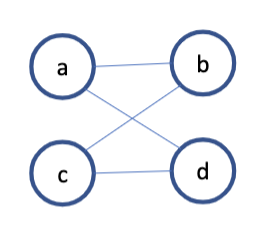 </div>

In [4]:
#! pip install --upgrade scipy networkx 
# Uncomment above line in case you might get the error "module 'scipy.sparse' has no attribute 'coo_array'" below

In [5]:
# Using networkx to generate the adjacency matrix is helpful if the graph is complex, unlike the example above

import networkx as nx
import numpy as np

G= nx.Graph()
G.add_nodes_from(['a', 'b', 'c', 'd'])
G.add_edge('a','b')
G.add_edge('b','c')
G.add_edge('c','d')
G.add_edge('d','a')

A=nx.adjacency_matrix(G, nodelist=['a', 'b', 'c', 'd'])


In [6]:
A_array = A.toarray().tolist()
A_array

[[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]

In [7]:
# If the adjacency matrix is displayed as one line, you can print it line by line:
for row in A_array:
    print(' '.join(map(str, row)))

0 1 0 1
1 0 1 0
0 1 0 1
1 0 1 0


<div class="alert alert-block alert-success"> <strong>Problem 7:</strong> Select all the graphs that are isomorphic. 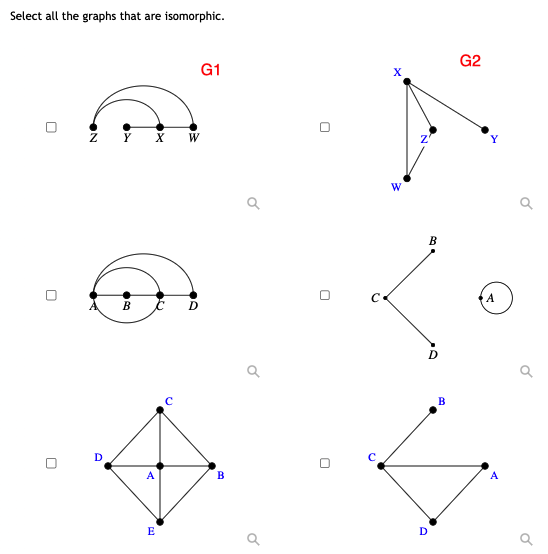</div>

In [8]:
# This code example demonstrates only testing on Graphs G1 and G2 above.
# You need to compare all 6 graphs to each other in order to thoroughly test them all in Python.

import networkx as nx

G1= nx.Graph()
G1.add_nodes_from(['W', 'X', 'Y', 'Z'])
G1.add_edge('W','X')
G1.add_edge('W','Z')
G1.add_edge('X','Z')
G1.add_edge('X','Y')

G2= nx.Graph()
G2.add_nodes_from(['W', 'X', 'Y', 'Z'])
G2.add_edge('Z','X')
G2.add_edge('Z','W')
G2.add_edge('X','Y')
G2.add_edge('X','W')

is_isomorphic = nx.is_isomorphic(G1, G2)
is_isomorphic


True

<div class="alert alert-block alert-success">
<b>Problem 9:</b> Model the floorplan shown below as an adjacency matrix:

<ol>
    <li>Create a Multigraph from the adjacency matrix in Python.</li>
    <li>Use the Python Networkx functions to determine if the graph has an Euler Circuit, and print the Euler Circuit. <em>(networkx doesn't have a method to determine Euler paths.)</em></li>
    <li>Plot the Multigraph in Python with the Euler Path or Circuit highlighted.</li>
</ol>

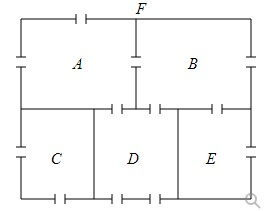

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Multigraph
# https://www.folkstalk.com/2022/09/multiple-edges-in-networkx-with-code-examples.html

# Drawing Multigraph nodes with labels
# https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx

# This first graph drawn is undirected
G=nx.MultiGraph ([('A','F'), ('A','F'), ('A','B'), ('A','D'), ('B','D'), ('B','F'), ('B','E'), ('C','F'), ('C','F'), ('D','F'), ('D','F'), ('E','F')
])

A=nx.adjacency_matrix(G, nodelist=['A', 'B', 'C', 'D', 'E', 'F'])

A.toarray().tolist()

[[0, 1, 0, 1, 0, 2],
 [1, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 2],
 [1, 1, 0, 0, 0, 2],
 [0, 1, 0, 0, 0, 1],
 [2, 1, 2, 2, 1, 0]]

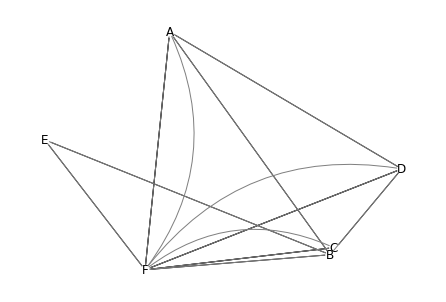

In [10]:
# Draw multigraph

pos = nx.random_layout(G)
nx.draw(G, pos, with_labels=True, node_color = 'w', node_size = 100, alpha=1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", color="0.5", # Making the arrowstyle a dash "-" makes the graph appear undirected
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()

# Keep reruning until you get a randomized layout to your liking

In [11]:
print ("Is Graph G Eulerian?:", nx.is_eulerian(G))

Is Graph G Eulerian?: True


In [12]:
list(nx.eulerian_circuit(G))

[('A', 'D'),
 ('D', 'B'),
 ('B', 'E'),
 ('E', 'F'),
 ('F', 'D'),
 ('D', 'F'),
 ('F', 'C'),
 ('C', 'F'),
 ('F', 'B'),
 ('B', 'A'),
 ('A', 'F'),
 ('F', 'A')]

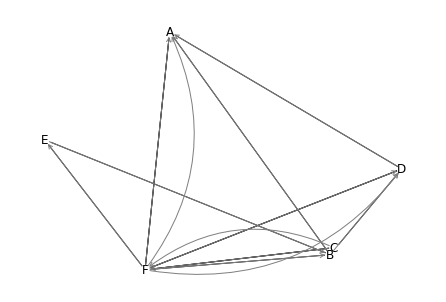

In [13]:
# Created a second multigraph G2 copied from the output above.
G2=nx.MultiGraph (
[('A', 'D'),
 ('D', 'B'),
 ('B', 'E'),
 ('E', 'F'),
 ('F', 'D'),
 ('D', 'F'),
 ('F', 'C'),
 ('C', 'F'),
 ('F', 'B'),
 ('B', 'A'),
 ('A', 'F'),
 ('F', 'A')])

# The second graph will show arrows as a directed graph to show a path

#pos = nx.random_layout(G) # Use the one we generated for G before
nx.draw(G2, pos, with_labels=True, node_color = 'w', node_size = 100, alpha=1)
#nx.draw_networkx(G, pos=pos, node_color = 'w')
ax = plt.gca()
for e in G2.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5", # Making the arrowstyle like "->" makes the graph appear undirected
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()

<div class="alert alert-block alert-success"> <strong>Problem 13:</strong><br> Find the shortest path from vertex A to vertex L. Give your answer as a sequence, like ABCFIL. 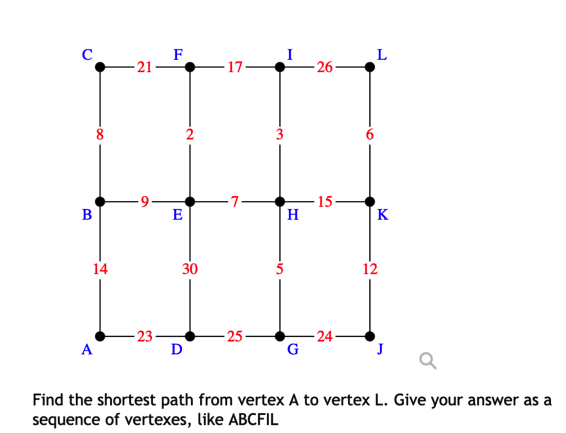 </div>

In [14]:
# Be sure you have run the first two cells so that the Node and Graph are defined!

matrix = [
    # Distance to 
    # A   B   C   D   E   F   G   H   I   J   K   L
    [ 0,  9,  0,  14, 0,  0,  0,  0,  0,  0,  0,  0],  # Node A distances to [A, B, C, D, E, F, G, G, I, J, K]
    [ 9,  0,  13, 0,  12, 0,  0,  0,  0,  0,  0,  0],  # B
    [ 0,  13, 0,  0,  0,  24, 0,  0,  0,  0,  0,  0],  # C
    [ 14, 0,  0,  0,  10, 0,  8,  0,  0,  0,  0,  0],  # D
    [ 0,  12, 0,  10, 0,  30, 0,  20, 0,  0,  0,  0],  # E
    [ 0,  0,  24, 0,  30, 0,  0,  0,  23, 0,  0,  0],  # F
    [ 0,  0,  0,  8,  0,  0,  0,  29, 0,  22, 0,  0],  # G
    [ 0,  0,  0,  0,  20, 0,  29, 0,  2,  0,  15, 0],  # H
    [ 0,  0,  0,  0,  0,  23, 0,  2,  0,  0,  0,  1],  # I
    [ 0,  0,  0,  0,  0,  0,  22, 0,  0,  0,  4,  0],  # J
    [ 0,  0,  0,  0,  0,  0,  0,  15, 0,  4,  0,  17],  # K
    [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  17, 0],  # L
] 

g = Graph(matrix)
g.shortest_path('a', 'l')

['a', 'b', 'e', 'h', 'i', 'l']

<div class="alert alert-block alert-success"> <strong>Problem 14:</strong> <br>Find the length of the shortest path from vertex A to vertex B.
 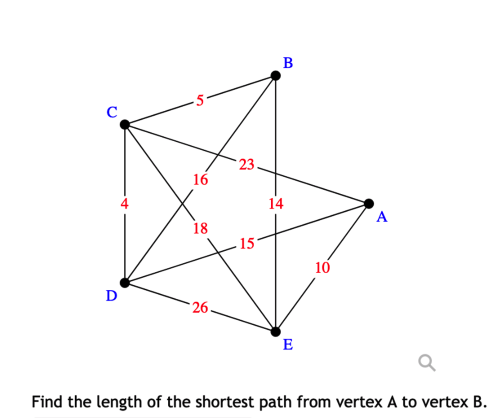 </div>

In [15]:
# Be sure you have run the first two cells so that the Node and Graph are defined!

# This time we instantiate the Node and Graph without the matrix
a, b, c, d, e = Node('a'), Node('b'), Node('c'), Node('d'), Node('e')
a.adjacent = {'c': 29, 'd': 8, 'e': 11}
b.adjacent = {'c': 4, 'd':19, 'e': 13}
c.adjacent = {'a': 29, 'b': 4, 'd': 16, 'e': 3}
d.adjacent = {'a': 8, 'b': 19, 'c': 16, 'e': 14}
e.adjacent = {'a': 11, 'b': 13, 'c': 3, 'd': 14}

g = Graph()
g.nodes = {n.name: n for n in [a, b, c, d, e]}

path = g.shortest_path('a', 'b')
distance = g.get_distance_of_path(path)

print(f"The shortest way from A -> B is via {path} with a distance of {distance}")

The shortest way from A -> B is via ['a', 'e', 'c', 'b'] with a distance of 18


<div class="alert alert-block alert-success"><b>Changes to Notebook</b></div>
<ul>
    <li>Added a comment to the code of Problems 13+14 that warns students that the first two cells containing the Node and Graph must be run.</li>
</ul>

In [ ]:
# Embedding images into notebooks using base64 encoding
# https://mljar.com/blog/jupyter-notebook-insert-image/